In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import ast
import os
from glob import glob

In [398]:
train_csv = pd.read_csv('D:/UET/ML/mouse_behavior/data/train.csv') 
test_csv = pd.read_csv('D:/UET/ML/mouse_behavior/data/test.csv')
train_annotation_path = 'D:/UET/ML/mouse_behavior/data/train_annotation'
train_tracking_path = 'D:/UET/ML/mouse_behavior/data/train_tracking'
test_tracking_path = 'D:/UET/ML/mouse_behavior/data/test_tracking'

ROOT = r"D:/UET/ML/mouse_behavior/data"

In [399]:
sample_annot_path = 'D:/UET/ML/mouse_behavior/data/train_annotation/AdaptableSnail/44566106.parquet'
sample_annot = pd.read_parquet(sample_annot_path)

sample_annot

,agent_id,target_id,action,start_frame,stop_frame
0,2,2,rear,4,139
1,4,2,avoid,13,52
2,4,4,rear,121,172
3,3,3,rear,156,213
4,4,4,rear,208,261
...,...,...,...,...,...
337,3,1,approach,18172,18184
338,2,2,rear,18195,18287
339,1,4,approach,18266,18305
340,3,3,rear,18297,18363


In [400]:
sample_tracking_path = 'D:/UET/ML/mouse_behavior/data/train_tracking/AdaptableSnail/44566106.parquet'
sample_tracking = pd.read_parquet(sample_tracking_path)

df_frame0 = sample_tracking[sample_tracking["video_frame"] == 5978]
df_frame0

,video_frame,mouse_id,bodypart,x,y
354347,5978,1,body_center,1059.633057,647.893982
354348,5978,1,ear_right,1081.849976,596.245972
354349,5978,1,headpiece_bottombackright,1028.686035,606.973999
354350,5978,1,headpiece_bottomfrontleft,1050.025024,554.635986
354351,5978,1,headpiece_bottomfrontright,1066.619019,579.213013
354352,5978,1,headpiece_topbackleft,1000.265015,576.249023
354353,5978,1,headpiece_topbackright,1017.155029,604.046021
354354,5978,1,headpiece_topfrontleft,1038.597046,548.028015
354355,5978,1,headpiece_topfrontright,1056.302002,578.682007
354356,5978,1,lateral_left,1025.718018,654.656006


## 1. EDA on `train.csv`

In [401]:
train_csv[train_csv['lab_id'].str.startswith('MABe22')]['behaviors_labeled'].count()

0

In [402]:
# Drop rows where lab_id starts with "MABe22"
mask_lab = train_csv['lab_id'].str.startswith('MABe22')

# Drop rows where behaviors_labeled is NaN or empty string
mask_behavior = train_csv['behaviors_labeled'].isna() | (train_csv['behaviors_labeled'].str.strip() == "")

# Combine masks
mask_drop = mask_lab | mask_behavior

# Keep only rows that do NOT match the mask
train_csv_final = train_csv[~mask_drop]

train_csv_final

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,UppityFerret,1610683375,C57Bl/6N,black,male,8.0,8 weeks,csds,CD1,white,...,13.0,664,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8785,UppityFerret,1725214092,C57Bl/6N,black,male,27.0,8 weeks,NaN,CD1,white,...,12.8,608,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,intromit"", ""mouse1,mouse2,moun...",DeepLabCut
8786,UppityFerret,1960237444,C57Bl/6N,black,male,14.0,8 weeks,csds,CD1,white,...,12.5,592,576,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut
8787,UppityFerret,2045808129,C57Bl/6N,black,male,12.0,8 weeks,csds,CD1,white,...,12.5,624,572,38.0,38.0,circular,neutral,"[""body_center"", ""ear_left"", ""ear_right"", ""hip_...","[""mouse1,mouse2,reciprocalsniff"", ""mouse1,mous...",DeepLabCut


In [403]:
def extract_behavior(train_csv):
    behavior_stats = {
        "total": 0,
        "self-oriented": set(),
        "social-oriented": set(),
    }

    for idx, row in train_csv.iterrows():
        behaviors_str = row['behaviors_labeled']

        if pd.isna(behaviors_str) or behaviors_str.strip() == "":
            continue

        behaviors_list = ast.literal_eval(behaviors_str)

        for behavior in behaviors_list:
            parts = behavior.split(',')
            if len(parts) == 3:
                agent = parts[0].strip()
                target = parts[1].strip()
                action = parts[2].strip()

                if target.lower() == 'self':
                    behavior_stats['self-oriented'].add(action)
                else:
                    behavior_stats['social-oriented'].add(action)

    behavior_stats['total'] = len(behavior_stats['self-oriented']) + len(behavior_stats['social-oriented'])
    return behavior_stats

behavior_stats = extract_behavior(train_csv_final)
behavior_stats

{'total': 40,
 'self-oriented': {'biteobject',
  'climb',
  'dig',
  'exploreobject',
  'freeze',
  'genitalgroom',
  'huddle',
  'rear',
  'rest',
  'run',
  'selfgroom'},
 'social-oriented': {"'attack'",
  "'dominance'",
  "'sniff'",
  'allogroom',
  'approach',
  'attack',
  'attemptmount',
  'avoid',
  'chase',
  'chaseattack',
  'defend',
  'disengage',
  'dominance',
  'dominancegroom',
  'dominancemount',
  'ejaculate',
  'escape',
  'flinch',
  'follow',
  'intromit',
  'mount',
  'reciprocalsniff',
  'shepherd',
  'sniff',
  'sniffbody',
  'sniffface',
  'sniffgenital',
  'submit',
  'tussle'}}

In [404]:
def extract_bodyparts(train_csv):
    unique_parts = set()

    for idx, row in train_csv.iterrows():
        bodyparts_str = row['body_parts_tracked']

        if pd.isna(bodyparts_str) or bodyparts_str.strip() == "":
            continue

        try:
            bodyparts_list = ast.literal_eval(bodyparts_str)
        except:
            continue

        unique_parts.update(bodyparts_list)

    return len(unique_parts), sorted(unique_parts)

bodyparts_stats = extract_bodyparts(train_csv_final)
bodyparts_stats

(25,
 ['body_center',
  'ear_left',
  'ear_right',
  'head',
  'headpiece_bottombackleft',
  'headpiece_bottombackright',
  'headpiece_bottomfrontleft',
  'headpiece_bottomfrontright',
  'headpiece_topbackleft',
  'headpiece_topbackright',
  'headpiece_topfrontleft',
  'headpiece_topfrontright',
  'hip_left',
  'hip_right',
  'lateral_left',
  'lateral_right',
  'neck',
  'nose',
  'spine_1',
  'spine_2',
  'tail_base',
  'tail_middle_1',
  'tail_middle_2',
  'tail_midpoint',
  'tail_tip'])

In [405]:
def extract_bodypart_combinations(train_csv):
    """
    Returns all unique bodypart combinations across the dataset.

    Each combination is a sorted tuple of bodyparts.
    """
    unique_combos = set()

    for idx, row in train_csv.iterrows():
        bodyparts_str = row["body_parts_tracked"]

        if pd.isna(bodyparts_str) or bodyparts_str.strip() == "":
            continue

        try:
            bodyparts_list = ast.literal_eval(bodyparts_str)
        except:
            continue

        combo = tuple(sorted(bodyparts_list))
        unique_combos.add(combo)

    return len(unique_combos), sorted(unique_combos)

bodyparts_combinations = extract_bodypart_combinations(train_csv_final)
bodyparts_combinations

(9,
 [('body_center',
   'ear_left',
   'ear_right',
   'headpiece_bottombackleft',
   'headpiece_bottombackright',
   'headpiece_bottomfrontleft',
   'headpiece_bottomfrontright',
   'headpiece_topbackleft',
   'headpiece_topbackright',
   'headpiece_topfrontleft',
   'headpiece_topfrontright',
   'lateral_left',
   'lateral_right',
   'neck',
   'nose',
   'tail_base',
   'tail_midpoint',
   'tail_tip'),
  ('body_center',
   'ear_left',
   'ear_right',
   'hip_left',
   'hip_right',
   'lateral_left',
   'lateral_right',
   'nose',
   'spine_1',
   'spine_2',
   'tail_base',
   'tail_middle_1',
   'tail_middle_2',
   'tail_tip'),
  ('body_center',
   'ear_left',
   'ear_right',
   'lateral_left',
   'lateral_right',
   'neck',
   'nose',
   'tail_base',
   'tail_midpoint',
   'tail_tip'),
  ('body_center',
   'ear_left',
   'ear_right',
   'lateral_left',
   'lateral_right',
   'nose',
   'tail_base'),
  ('body_center',
   'ear_left',
   'ear_right',
   'lateral_left',
   'lateral_ri

## 2. EDA on `train_annotation`

In [406]:
def load_annotations_for_lab(annotation_root, lab_name):
    lab_dir = os.path.join(annotation_root, lab_name)
    pq_files = glob(os.path.join(lab_dir, "*.parquet"))

    rows = []
    for pq in pq_files:
        df = pd.read_parquet(pq)
        df["video_id"] = os.path.basename(pq).replace(".parquet", "")
        df["lab"] = lab_name
        rows.append(df)

    if len(rows) == 0:
        raise ValueError(f"No annotation files found for lab {lab_name}")

    ann = pd.concat(rows, ignore_index=True)
    ann["duration"] = ann["stop_frame"] - ann["start_frame"] + 1
    return ann

### 2.1. Action Duration Stats

In [407]:
def compute_duration_stats(ann):
    stats = (
        ann.groupby("action")["duration"]
           .agg([
               "count",
               "mean",
               "median",
               "min",
               "max",
               "std",
               lambda x: x.quantile(0.05)
           ])
           .rename(columns={"<lambda_0>": "5th percentile"}) # to select min duration for each action
           .sort_values("mean")
    )
    return stats

In [408]:
def plot_histograms(ann, lab_name):
    actions = ann["action"].unique()
    for action in actions:
        subset = ann[ann["action"] == action]
        plt.figure(figsize=(7, 4))
        sns.histplot(subset["duration"], bins=30)
        plt.title(f"[{lab_name}] Duration Histogram: {action}")
        plt.xlabel("Duration (frames)")
        plt.show()

In [409]:
def plot_action_duration_boxplot(ann, lab_name):
    plt.figure(figsize=(14, 5))
    sns.boxplot(data=ann, x="action", y="duration")
    plt.xticks(rotation=50)
    plt.title(f"[{lab_name}] Action Duration Distribution")
    plt.show()

### 2.3. Class Imbalance per Action

In [410]:
def compute_imbalance(ann):
    pos = (
        ann.groupby("action")["duration"]
           .sum()
           .rename("positive_frames")
           .sort_values(ascending=False)
           .to_frame()
    )
    total = pos["positive_frames"].sum()
    pos["percent_of_all_actions"] = pos["positive_frames"] / total * 100
    return pos

In [411]:
def plot_positive_frames(imbalance_df, lab_name):
    df = imbalance_df.reset_index()
    plt.figure(figsize=(14, 5))
    sns.barplot(data=df, x="action", y="positive_frames")
    plt.xticks(rotation=50)
    plt.title(f"[{lab_name}] Positive Frame Count per Action")
    plt.show()

### Run full EDA per lab

Using `run_full_eda_for_lab` to see distribution of duration of each action per lab/body_parts_tracked. We want to observe mostly `duration_stats` (mean, min, max, std, etc.) to select precise window sizes for feature engineering.


       LAB: UppityFerret


--- Duration Stats (per action) ---

                 count       mean  median  min   max         std  \
action                                                             
reciprocalsniff    834  21.844125    12.0    3   433   35.169658   
sniffgenital      1028  39.856031    15.0    3  1329  109.500596   
huddle             299  81.762542    37.0    4  1372  143.998300   

                 5th percentile  
action                           
reciprocalsniff             4.0  
sniffgenital                3.0  
huddle                     10.0  


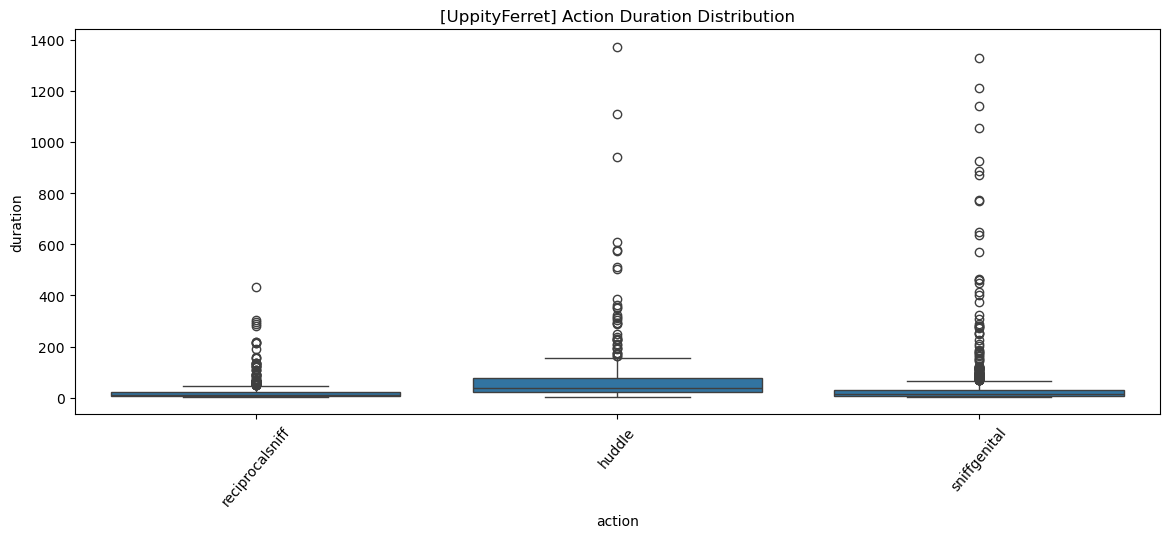

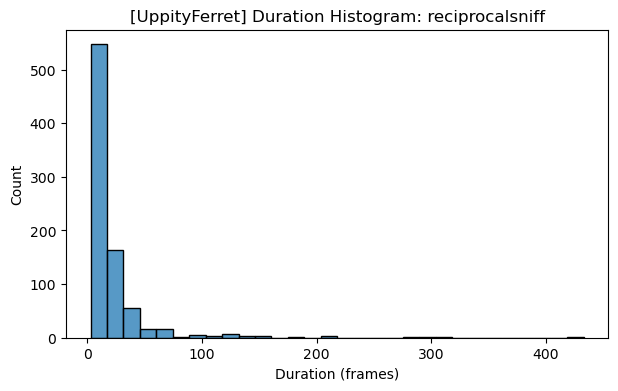

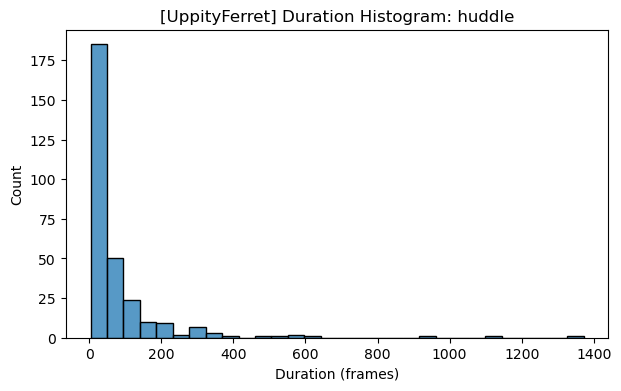

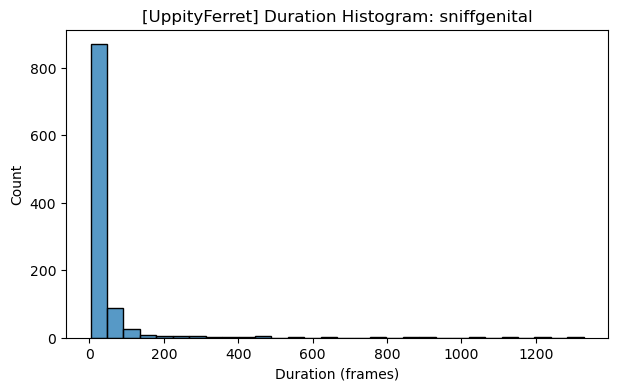


--- Class Imbalance (per action) ---

                 positive_frames  percent_of_all_actions
action                                                  
sniffgenital               40972               48.987888
huddle                     24447               29.229886
reciprocalsniff            18218               21.782226


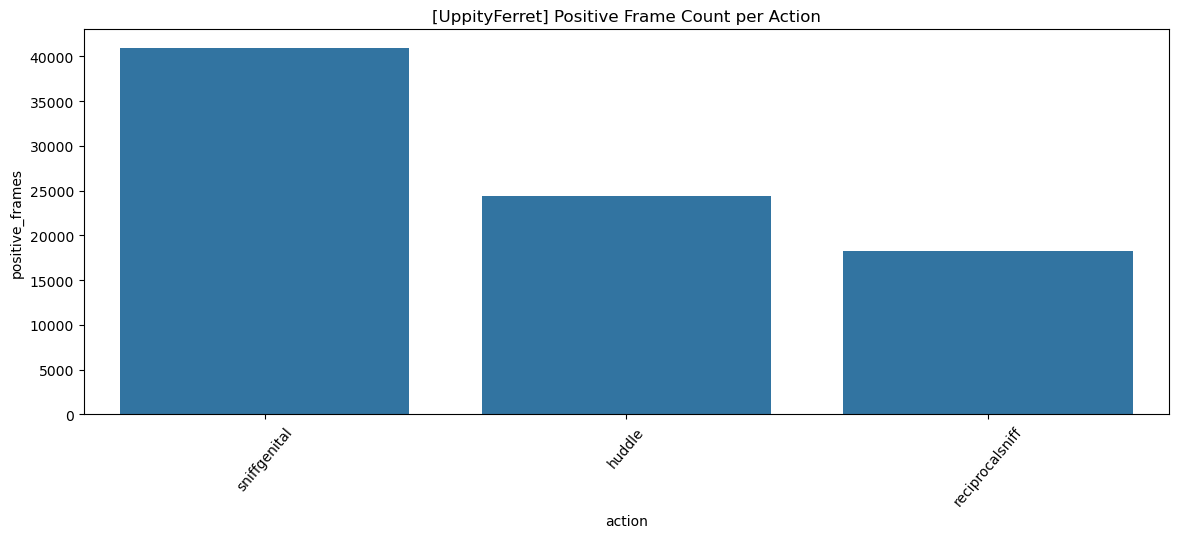

{'ann':       agent_id  target_id           action  start_frame  stop_frame  \
 0            1          2  reciprocalsniff         4580        4584   
 1            2          1  reciprocalsniff         4580        4584   
 2            1          1           huddle         4635        4668   
 3            1          2     sniffgenital         4985        5210   
 4            2          1  reciprocalsniff         5236        5254   
 ...        ...        ...              ...          ...         ...   
 2156         1          2     sniffgenital        14105       14113   
 2157         2          1     sniffgenital        14120       14128   
 2158         1          2     sniffgenital        14139       14156   
 2159         1          2     sniffgenital        14170       14174   
 2160         2          1     sniffgenital        14316       14331   
 
         video_id           lab  duration  
 0     1085105007  UppityFerret         5  
 1     1085105007  UppityFerret        

In [412]:
def run_full_eda_for_lab(annotation_path,lab_name):
    print(f"\n==============================")
    print(f"       LAB: {lab_name}")
    print(f"==============================\n")

    ann = load_annotations_for_lab(annotation_path, lab_name)

    # 1. Duration stats
    duration_stats = compute_duration_stats(ann)
    print("\n--- Duration Stats (per action) ---\n")
    print(duration_stats)

    # 2. Duration boxplot
    plot_action_duration_boxplot(ann, lab_name)

    # 3. Histograms
    plot_histograms(ann, lab_name)

    # 4. Class imbalance stats
    imbalance_df = compute_imbalance(ann)
    print("\n--- Class Imbalance (per action) ---\n")
    print(imbalance_df)

    # 5. Barplot
    plot_positive_frames(imbalance_df, lab_name)

    return {
        "ann": ann,
        "duration_stats": duration_stats,
        "imbalance": imbalance_df
    }

run_full_eda_for_lab(train_annotation_path, "UppityFerret")

Using `compute_positive_negative_frames` to understand the class imbalance in each lab/body_parts_tracked. Therefore better setups for StratifiedShuffleSplit/StratifiedSubsetClassifier can be produced.

In [413]:
def compute_positive_negative_frames(annotation_root, tracking_root, lab_name):
    lab_ann_dir = os.path.join(annotation_root, lab_name)
    lab_trk_dir = os.path.join(tracking_root, lab_name)

    ann_files = glob(os.path.join(lab_ann_dir, "*.parquet"))
    trk_files = {os.path.basename(p).replace(".parquet", ""): p
                 for p in glob(os.path.join(lab_trk_dir, "*.parquet"))}

    results = []

    for ann_path in ann_files:
        video_id = os.path.basename(ann_path).replace(".parquet", "")

        if video_id not in trk_files:
            continue  # no tracking file? skip

        ann = pd.read_parquet(ann_path)
        trk = pd.read_parquet(trk_files[video_id])

        # total frames in this video
        total_frames = trk["video_frame"].max() + 1

        # add duration
        ann["duration"] = ann["stop_frame"] - ann["start_frame"] + 1

        # sum positive durations per action
        pos = ann.groupby("action")["duration"].sum()

        for action, pos_frames in pos.items():
            neg_frames = total_frames - pos_frames
            pos_ratio = pos_frames / total_frames
            neg_ratio = neg_frames / total_frames

            results.append({
                "lab": lab_name,
                "video_id": video_id,
                "action": action,
                "positive_frames": pos_frames,
                "negative_frames": neg_frames,
                "total_frames": total_frames,
                "positive_ratio": pos_ratio,
                "negative_ratio": neg_ratio
            })

    # convert to dataframe
    df = pd.DataFrame(results)

    if df.empty:
        raise ValueError(f"No annotations or tracking matched for lab {lab_name}")

    # aggregate over videos to get per-action totals
    summary = df.groupby("action").agg({
        "positive_frames": "sum",
        "negative_frames": "sum",
        "total_frames": "sum"
    })

    summary["positive_ratio"] = summary["positive_frames"] / summary["total_frames"]
    summary["negative_ratio"] = summary["negative_frames"] / summary["total_frames"]

    return df, summary

df_v, summary = compute_positive_negative_frames(train_annotation_path, train_tracking_path, "BoisterousParrot")
summary.head(20)

,positive_frames,negative_frames,total_frames,positive_ratio,negative_ratio
action,,,,,
shepherd,29652,4722555,4752207,0.00624,0.99376


## 3. EDA on `train_tracking`

The goal is analyzing missing body part data, xy coords, velocity spikes, etc.`

In [414]:
sample_tracking_path = 'D:/UET/ML/mouse_behavior/data/train_tracking/AdaptableSnail/44566106.parquet'
sample_tracking = pd.read_parquet(sample_tracking_path)

### 3.1. Missing coords rate

In [415]:
def load_tracking_wide(path):
    df = pd.read_parquet(path)

    # pivot to wide format: each bodypart has x, y columns
    df_wide = df.pivot_table(
        index=["video_frame", "mouse_id"],
        columns=["bodypart"],
        values=["x", "y"]
    )

    # flatten multi_index columns: (x, "nose") -> "nose_x"
    df_wide.columns = [f"{bp}_{coord}" for coord, bp in df_wide.columns]

    df_wide.reset_index()

    return df_wide

In [416]:
def missing_stats(df_wide):
    coords = [c for c in df_wide.columns if c.endswith("_x") or c.endswith("_y")]
    return df_wide[coords].isna().mean().mean()

tracking = load_tracking_wide(sample_tracking_path)
missing_stats(tracking)

0.18100509020812627

In [417]:
tracking

body_center_x   ear_left_x  ear_right_x  \
video_frame mouse_id                                            
0           1           1161.543945          NaN  1146.305054   
            2            334.800995          NaN   310.395996   
            3           1152.323975  1202.071045  1146.833984   
            4            369.373993          NaN   355.019012   
1           1           1162.682983          NaN  1139.979980   
...                             ...          ...          ...   
18449       4            274.894012   269.326996   304.476990   
18450       1            383.847992   331.944000   344.325012   
            2            876.814026          NaN   815.935974   
            3            699.848999          NaN   640.382019   
            4            273.367004   260.401001          NaN   

                      headpiece_bottombackleft_x  headpiece_bottombackright_x  \
video_frame mouse_id                                                            
0           1                                NaN                          NaN   
            2                         381.666992                   364.747986   
            3                        1212.435059                  1182.329956   
            4                                NaN                          NaN   
1           1                                NaN                          NaN   
...                                          ...                          ...   
18449       4                                NaN                   252.278000   
18450       1                         307.075989                   345.516998   
            2                                NaN                   873.736023   
            3                                NaN                          NaN   
            4                                NaN                   257.652008   

                      headpiece_bottomfrontleft_x  \
video_frame mouse_id                                
0           1                                 NaN   
            2                          362.169006   
            3                         1195.391968   
            4                          395.816986   
1           1                                 NaN   
...                                           ...   
18449       4                                 NaN   
18450       1                                 NaN   
            2                          826.468994   
            3                          649.797974   
            4                          292.335999   

                      headpiece_bottomfrontright_x  headpiece_topbackleft_x  \
video_frame mouse_id                                                          
0           1                          1163.192017                      NaN   
            2                           338.841003               394.040985   
            3                          1155.413940              1210.114990   
            4                           377.821991               428.032013   
1           1                          1162.135986                      NaN   
...                                            ...                      ...   
18449       4                                  NaN               237.453995   
18450       1                           311.819000               305.839996   
            2                           824.044006               880.101013   
            3                           652.075989               704.762024   
            4                                  NaN               237.643005   

                      headpiece_topbackright_x  headpiece_topfrontleft_x  ...  \
video_frame mouse_id                                                      ...   
0           1                      1192.211060               1191.343994  ...   
            2                       366.553986                375.097992  ...   
            3                      1187.936035               1182.692017  ...   

### 3.2. Coords scaling (to see if image size/normalization needed)

In [418]:
coords = [c for c in tracking if c.endswith("_x") or c.endswith("_y")]
coord_min = tracking[coords].min().min()
coord_max = tracking[coords].max().max()
print(coord_min, coord_max)

11.824000358581543 1228.1600341796875
